In [3]:
import numpy as np
import pandas as pd
import csv
from csv import DictReader
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [4]:
def getStockDataSet(FileName):
    Stonks = []
    with open(FileName,'r') as data:
        for line in csv.reader(data):
            Stonks.append(line)
    return np.asarray(Stonks[1:])

def assembleMultiClassProblem(stocks):
    STreturn = np.delete(stocks, 0, 1)
    STreturn = np.delete(STreturn, 0, 1)
    STreturn = np.delete(STreturn, 3, 1)
    X = np.asarray(STreturn[:, 0:3], dtype = float)
    Y = np.asarray(STreturn[:, 3], dtype = int)
    return (X, Y)

def getMaxClass(stocks):
    avg = [0,0,0,0]
    count = [0,0,0,0]
    for i in stocks:
        index = int(i[6])
        perf = float(i[5])
        avg[index] += perf
        count[index] += 1
    for i in range(4):
        avg[i] = avg[i]/count[i]
    return np.argmax(avg)

def assembleSingleClassProblem(stocks):
    STreturn = np.delete(stocks, 0, 1)
    STreturn = np.delete(STreturn, 0, 1)
    STreturn = np.delete(STreturn, 3, 1)
    X = np.asarray(STreturn[:, 0:3], dtype = float)
    Y = np.asarray(STreturn[:, 3], dtype = int)
    ma = getMaxClass(stocks)
    Y[Y[:] != ma] = 5
    Y[Y[:] == ma] = 0
    Y[Y[:] == 5] = 1
    return (X,Y)

def assembleRegressiveProblem(stocks):
    STreturn = np.delete(stocks, 0, 1)
    STreturn = np.delete(STreturn, 0, 1)
    STreturn = np.delete(STreturn, 4, 1)
    X = np.asarray(STreturn[:, 0:3], dtype = float)
    Y = np.asarray(STreturn[:, 3], dtype = float)
    return (X, Y)

In [5]:
def PlotStocks(stocks):
    avg = [0,0,0,0]
    count = [0,0,0,0]
    for i in stocks:
        index = int(i[6])
        perf = float(i[5])
        avg[index] += perf
        count[index] += 1
    for i in range(4):
        avg[i] = avg[i]/count[i]
    plt.bar([0,1,2,3], avg, color ='blue',
            width = 0.4)
    plt.show()


In [6]:
stocks2018 = getStockDataSet("YearsSimulation0.csv")

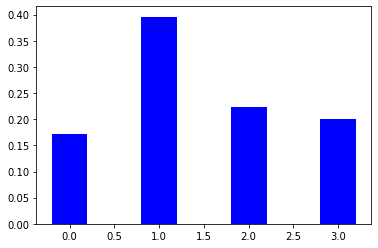

In [5]:

PlotStocks(stocks2018)


<h3> Model Generators </h3>

In [7]:
def svmRBFModel(X, Y):
    clf = svm.NuSVC(gamma="auto")
    clf.fit(X, Y)
    return clf

def classTreeEnsambleMethod(X, Y, estimators = 10):
    clf = RandomForestClassifier(n_estimators=estimators)
    clf = clf.fit(X, Y)
    return clf
def regTreeEnsambleMethod(X, Y, estimators = 10):
    clf = RandomForestRegressor(n_estimators=estimators)
    clf = clf.fit(X, Y)
    return clf


In [8]:
binaryX, binaryY = assembleSingleClassProblem(stocks2018)
multiClassX, multiClassY = assembleMultiClassProblem(stocks2018)
reggressiveX, reggressiveY = assembleRegressiveProblem(stocks2018)

In [9]:
# svmBinClass = svmRBFModel(binaryX, binaryY)
# svmMultiClass = svmRBFModel(multiClassX, multiClassY)

ensambleBinClass = classTreeEnsambleMethod(binaryX, binaryY)
ensambleMultiClass = classTreeEnsambleMethod(multiClassX, multiClassY)
ensambleReg = regTreeEnsambleMethod(reggressiveX, reggressiveY)

<h1> Global Models </h1>

<h3> Partial Dependence Plots (PDP) </h3>

In [12]:
from sklearn.inspection import PartialDependenceDisplay

<h4> Binary Ensamble Tree </h4>

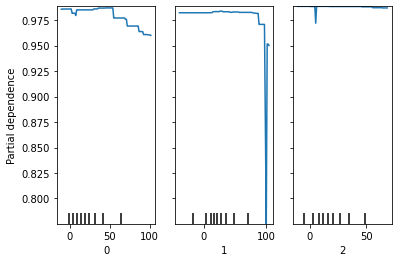

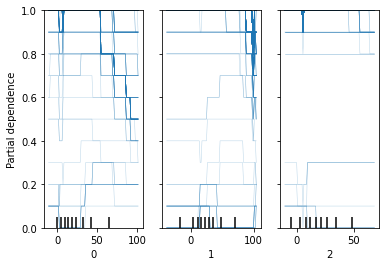

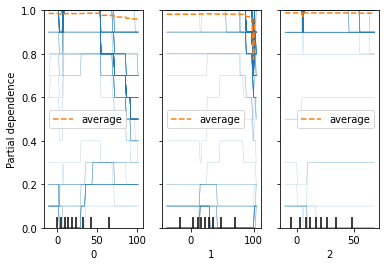

In [13]:
features = [0,1,2]
PartialDependenceDisplay.from_estimator(ensambleBinClass, binaryX, features)
PartialDependenceDisplay.from_estimator(ensambleBinClass, binaryX, features, kind='individual')
PartialDependenceDisplay.from_estimator(ensambleBinClass, binaryX, features, kind='both')

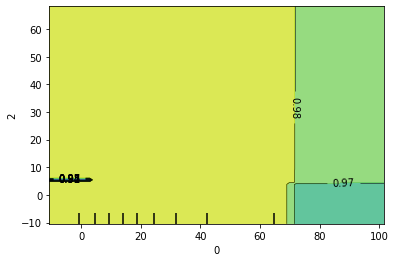

In [14]:
features = [(0,2)]
PartialDependenceDisplay.from_estimator(ensambleBinClass, binaryX, features)

<h4> Multi-Class </h4>

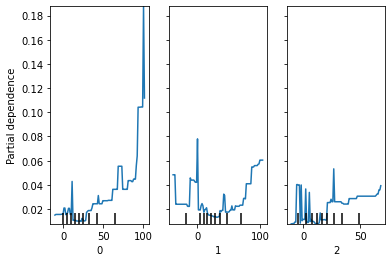

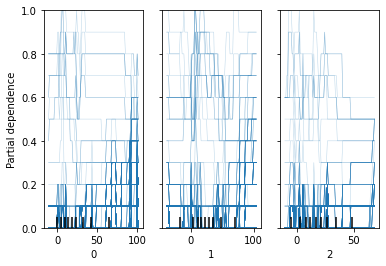

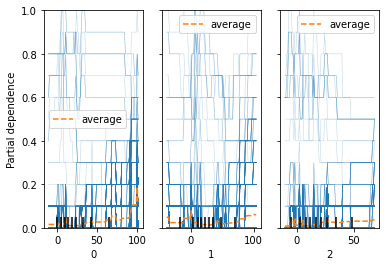

In [15]:
features = [0,1,2]
PartialDependenceDisplay.from_estimator(ensambleMultiClass, multiClassX, features, target = 1)
PartialDependenceDisplay.from_estimator(ensambleMultiClass, multiClassX, features, kind='individual' , target = 1)
PartialDependenceDisplay.from_estimator(ensambleMultiClass, multiClassX, features, kind='both', target = 1)

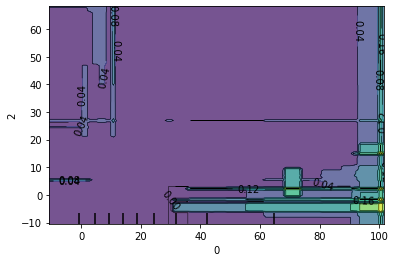

In [16]:
features = [(0,2)]
PartialDependenceDisplay.from_estimator(ensambleMultiClass, multiClassX, features, target = 1)


<h4> Reggressive </h4>

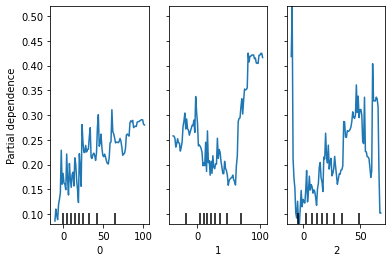

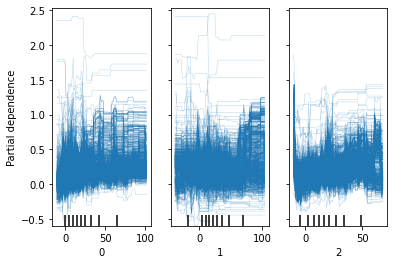

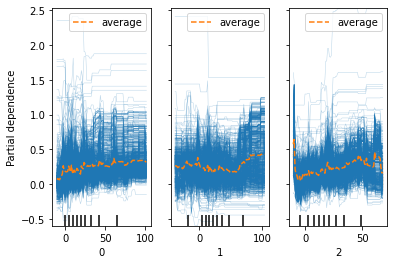

In [20]:
features = [0,1,2]
PartialDependenceDisplay.from_estimator(ensambleReg, reggressiveX, features)
PartialDependenceDisplay.from_estimator(ensambleReg, reggressiveX, features, kind='individual')
PartialDependenceDisplay.from_estimator(ensambleReg, reggressiveX, features, kind='both')

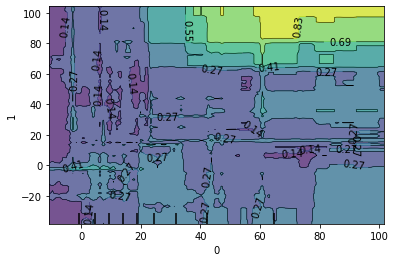

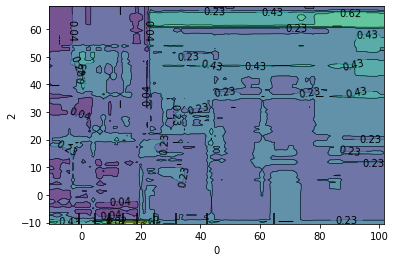

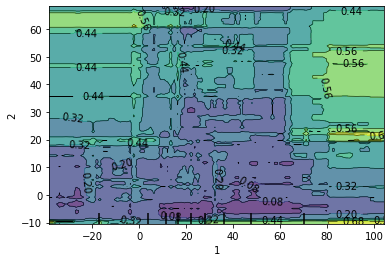

In [21]:
features = [(0,1)]
PartialDependenceDisplay.from_estimator(ensambleReg, reggressiveX, features)
features = [(0,2)]
PartialDependenceDisplay.from_estimator(ensambleReg, reggressiveX, features)
features = [(1,2)]
PartialDependenceDisplay.from_estimator(ensambleReg, reggressiveX, features)

<h3> Permutation Feature Importance </h3>

In [22]:
from sklearn.inspection import permutation_importance

<h4> Binary </h4>


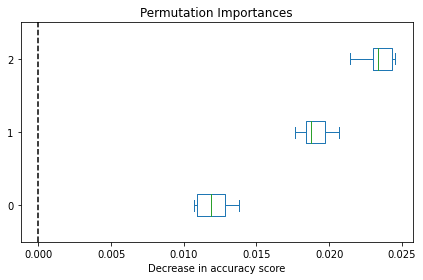

In [23]:
result = permutation_importance(
    ensambleBinClass, binaryX, binaryY, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

<h4> Multi-Class </h4>

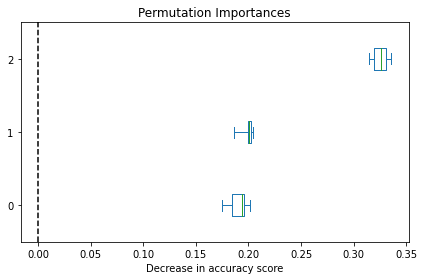

In [24]:
result = permutation_importance(
    ensambleMultiClass, multiClassX, multiClassY, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

<h4> Regressive </h4>

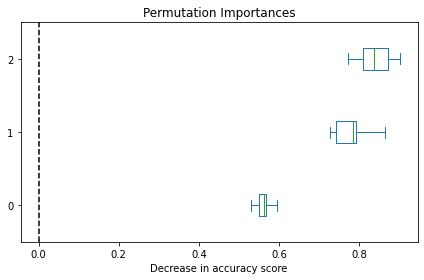

In [25]:
result = permutation_importance(
    ensambleReg, reggressiveX, reggressiveY, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

<h1> Local Models </h1>

<h3> LIME </h3>

In [8]:
import lime
import lime.lime_tabular

<h4> Binary Model </h4>

In [9]:
explainer = lime.lime_tabular.LimeTabularExplainer(binaryX)
exp = explainer.explain_instance(binaryX[70], ensambleBinClass.predict_proba)
exp.show_in_notebook(show_table=True)

<h4> Multi-Class </h4>

In [10]:
explainer = lime.lime_tabular.LimeTabularExplainer(multiClassX)
exp = explainer.explain_instance(multiClassX[70], ensambleMultiClass.predict_proba)
exp.show_in_notebook(show_table=True)

<h4> Regressive </h4>

In [11]:
explainer = lime.lime_tabular.LimeTabularExplainer(reggressiveX, mode='regression')
exp = explainer.explain_instance(reggressiveX[70], ensambleReg.predict)
exp.show_in_notebook(show_table=True)

<h3> SHAP </h3>

In [11]:
import shap
from shap import KernelExplainer, initjs
initjs()

<h4> Binary </h4>

In [21]:
explainer = shap.TreeExplainer(ensambleBinClass)
shap_values = explainer.shap_values(binaryX[70])
shap.force_plot(explainer.expected_value[0], shap_values[1], binaryX[70])

In [23]:
explainer = shap.TreeExplainer(ensambleBinClass)
shap_values = explainer.shap_values(binaryX[0:100])
shap.force_plot(explainer.expected_value[1], shap_values[1], binaryX[70])

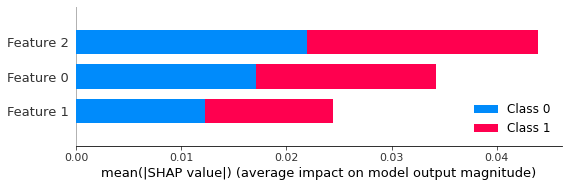

In [44]:
shap_values = explainer.shap_values(binaryX)
shap.summary_plot(shap_values)

In [45]:
explainer = shap.TreeExplainer(ensambleBinClass)
shap_values = explainer.shap_values(binaryX)
shap.force_plot(explainer.expected_value[0], shap_values[0], binaryX, link="logit")

<h4> Multi-Class </h4>

In [31]:
explainer = shap.TreeExplainer(ensambleMultiClass)
shap_values = explainer.shap_values(multiClassX[70])

shap.force_plot(explainer.expected_value[1], shap_values[2], multiClassX[70])

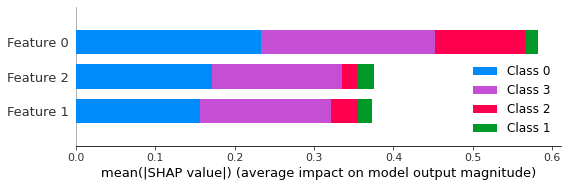

In [76]:
shap_values = explainer.shap_values(multiClassX)
shap.summary_plot(shap_values)

In [32]:
explainer = shap.TreeExplainer(ensambleMultiClass)
shap_values = explainer.shap_values(multiClassX)
shap.force_plot(explainer.expected_value[1], shap_values[1], multiClassX, link="logit")

In [78]:
explainer = shap.TreeExplainer(ensambleMultiClass)
shap_values = explainer.shap_values(multiClassX)
shap.force_plot(explainer.expected_value[0], shap_values[1], multiClassX, link="logit")

<h4> Regressive </h4>

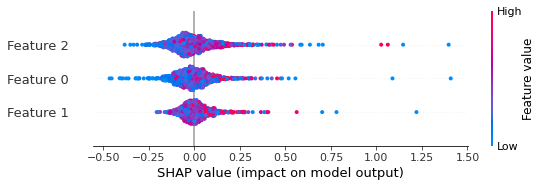

In [91]:
explainer = shap.TreeExplainer(ensambleReg)
shap_values = explainer.shap_values(reggressiveX)

shap.summary_plot(shap_values, reggressiveX)

In [92]:
shap.force_plot(
    explainer.expected_value,
    shap_values,
    reggressiveX[70]
)